<a href="https://colab.research.google.com/github/gbangout-apziva/MonReader/blob/main/monreader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hardware and vision

We want to predict if an image is flip or not with a good accuracy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report
from PIL import Image,ImageOps

## Data Preparation
* Data Exploration
* Data preprocessing
* Splitting data into train and test

### Data Exploration: 
* we visualized a sample image 
* we check the dimensions and size of the sample image: it shows that we need to optimize the size of images
* To reduce the image we cropped the image and set new borders and resolution

width is : 1080
height is : 1920


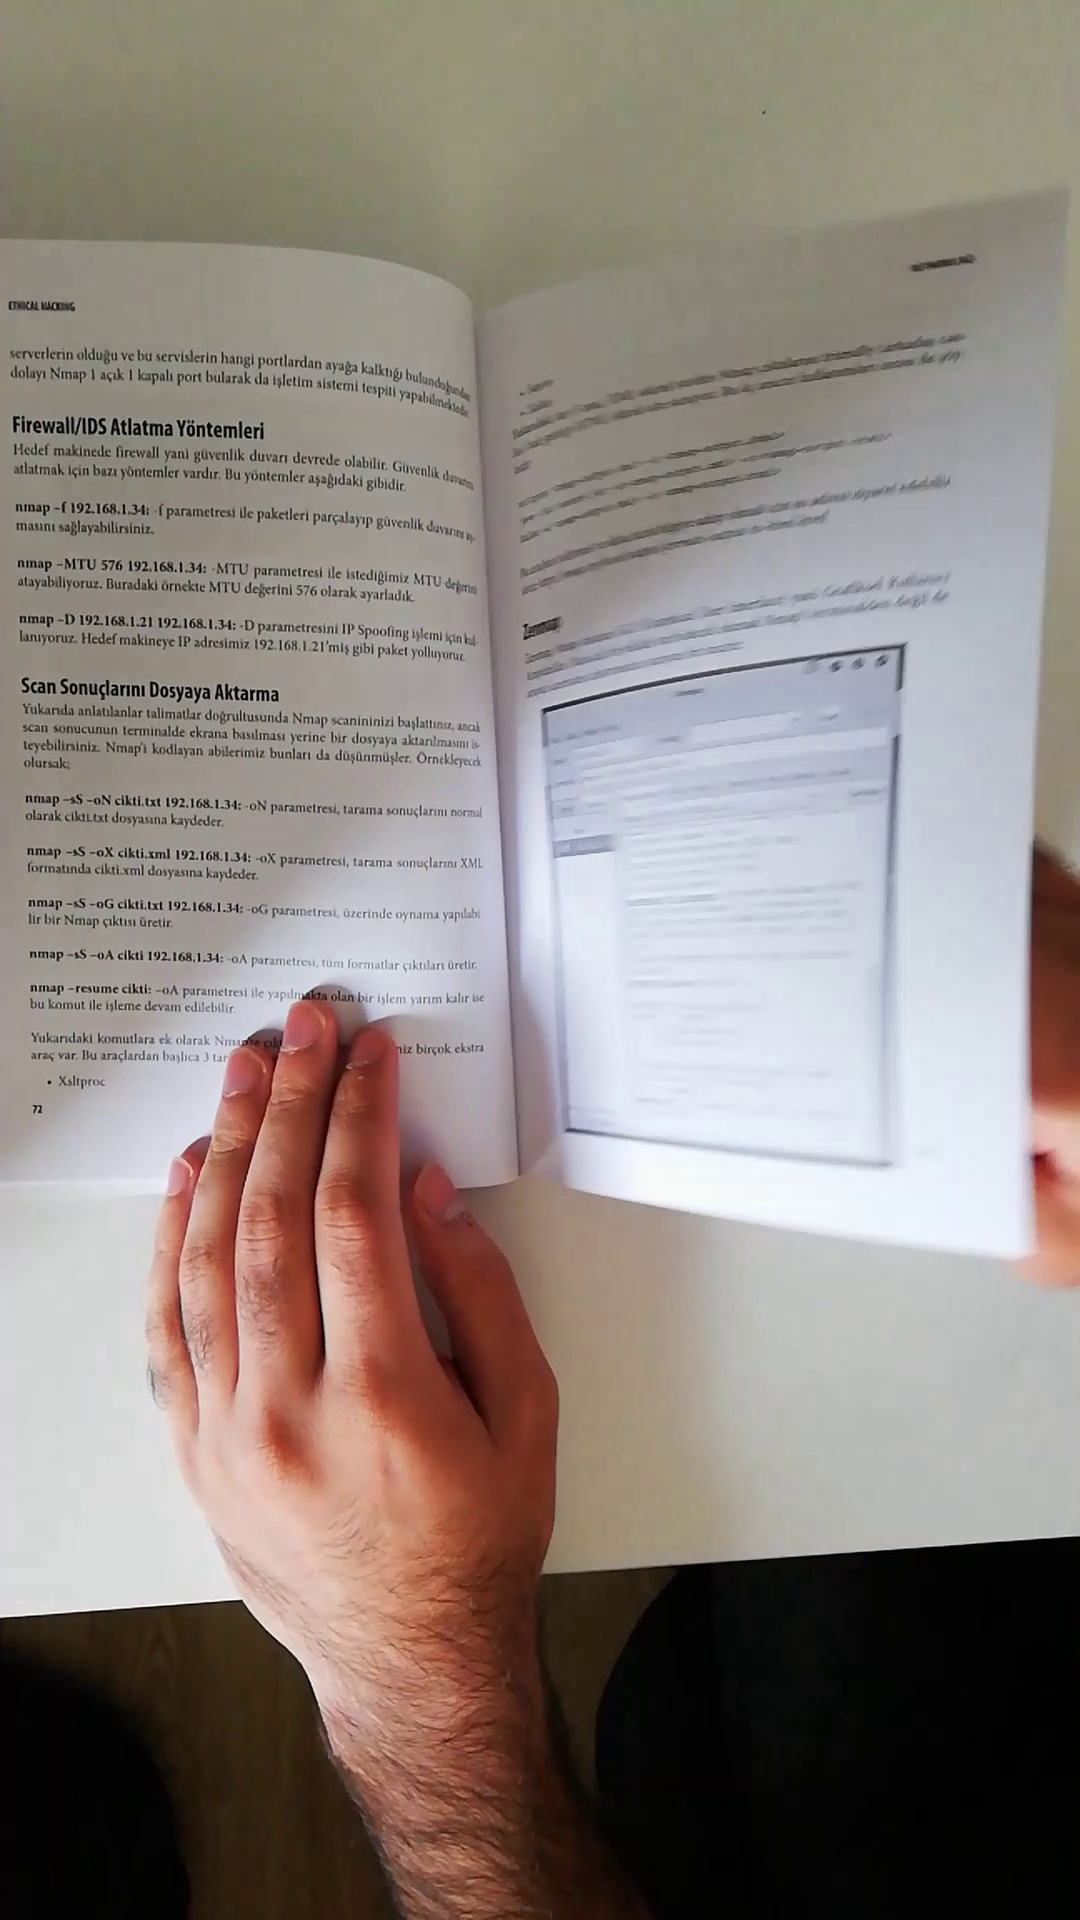

In [21]:
src="/content/drive/MyDrive/colabnotes/monreader/images/training/flip/"
file="0001_000000010.jpg"
im=Image.open(src+file)
width, height = im.size
print('width is :', width), print('height is :', height)
#len(im.fp.read())
display(im)

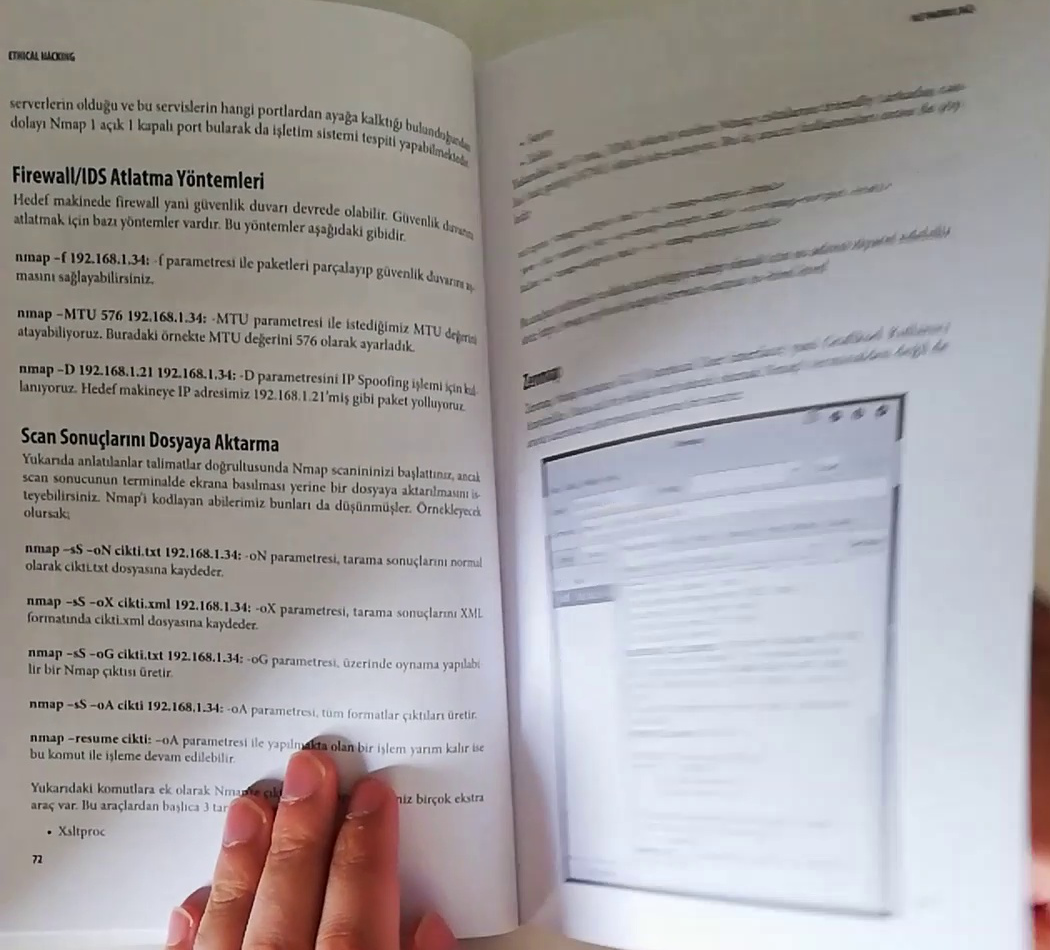

new width is : 1050
new height is : 950


In [23]:
(left, upper, right, lower) = (0, 250, 1050, 1200)
im_crop = im.crop((left, upper, right, lower))
display(im_crop)
width, height = im_crop.size
print('new width is :', width), print('new height is :', height)
im_crop.save("/content/drive/MyDrive/colabnotes/monreader/images/training/cropped_image.jpg")



In [24]:
#when saving the image we further reduce it size by reduce its quality
#im_crop.save("/content/drive/MyDrive/colabnotes/monreader/images/training/cropped_image_lowq.jpg",quality=20,optimize=True)

### Data preprocessing: 
* we reduced the size of the training images
*  we reduced the size of the testing images
* Reshape train and test data to make these work for keras neural network

In [ ]:

#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/training/flip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/training/flip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)


In [ ]:
#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/training/notflip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/training/notflip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)

In [ ]:
#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/testing/flip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/testing/flip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)

In [ ]:
#(left, upper, right, lower) = (0, 250, 1050, 1200)
#src="/content/drive/MyDrive/colabnotes/monreader/images/testing/notflip/"
#src2="/content/drive/MyDrive/colabnotes/monreader/images/testing/notflip_treated/"
#files=os.listdir(src)
#for file in files:
#    im=Image.open(src+file)
#    im_crop = im.crop((left, upper, right, lower))
#    im_crop.save(src2+file,quality=20,optimize=True)

### Splitting data into train and test:
* Building the training data
* Building the testing data
* Store [X_train, X_test, y_train, y_test] objets to optimze the RAM usage
* Getting back the objects to continue the modelling

In [8]:
#Build Training data
X_train=[]
y_train=[]
#Load arrays for each of the positive classes in training data and add a label of 1
src="/content/drive/MyDrive/colabnotes/monreader/images/training/flip_treated/"
files=os.listdir(src)
for file in files:
    X_train.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_train.append(1)

In [9]:
#load arrays for each of the negative classes in training data and add a label of 0
src="/content/drive/MyDrive/colabnotes/monreader/images/training/notflip_treated/"
files=os.listdir(src)
for file in files:
    X_train.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_train.append(0)

In [20]:
#Build test data
X_test=[]
y_test=[]
#load arrays for each of the positive classes in test data and add a label of 1
src="/content/drive/MyDrive/colabnotes/monreader/images/testing/flip_treated/"
files=os.listdir(src)
for file in files:
    X_test.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_test.append(1)

In [21]:
#load arrays for each of the negative classes in test data and add a label of 0
src="/content/drive/MyDrive/colabnotes/monreader/images/testing/notflip_treated/"
files=os.listdir(src)
for file in files:
    X_test.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_test.append(0)

In [22]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [23]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [24]:
X_train.shape

(2392, 950, 1050)

In [25]:
X_test.shape

(597, 950, 1050)

In [26]:
#Reshape to make these work for keras neural network
X_train=X_train.reshape(2392,950,1050,1)
X_test=X_test.reshape(597,950,1050,1)

In [3]:
import pickle

In [30]:
# Saving the objects:
with open('/content/drive/MyDrive/colabnotes/monreader/objs1.pkl', 'wb') as f:
   pickle.dump([X_train, X_test, y_train, y_test], f)

In [4]:
# Getting back the objects:
with open('/content/drive/MyDrive/colabnotes/monreader/objs1.pkl','rb') as f:  # Python 3: open(..., 'rb')
    X_train, X_test, y_train, y_test = pickle.load(f)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2392, 950, 1050, 1), (597, 950, 1050, 1), (2392,), (597,))

## Modelling

* Import packages to build neural network
* Create the cnn model
* Train the network
* ploting the loss function for the training and validation for several epochs
* plotting the training and validation accuracy
* plotting a heatmap with a confusion matrix
* The classification report show a good f1-score about 91.5% 

In [7]:
#Import packages to build neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
#Create the model
cnn=Sequential()
#initially 16 convolution nodes
cnn.add(Conv2D(16,(3,3),padding="same",activation='relu',input_shape=X_train.shape[1:]))
#add a Max Pooling layer
cnn.add(MaxPooling2D())
#another 16 convolution nodes
cnn.add(Conv2D(16,(3,3),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Add 8 convolutions
cnn.add(Conv2D(8,(2,2),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Flatten before adding fully connected layer
cnn.add(Flatten())
#Add a hidden layer with 50 nodes
cnn.add(Dense(50,activation='relu'))
#Add another hidden layer with 25 nodes
cnn.add(Dense(25,activation='relu'))
#Add final output layer with 1 output nodes using sigmoid
cnn.add(Dense(1,activation='sigmoid'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 950, 1050, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 475, 525, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 475, 525, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 237, 262, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 237, 262, 8)       520       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 118, 131, 8)      0

In [10]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [11]:
#train the network
history=cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
75/75 [==============================] - 73s 768ms/step - loss: 4.2679 - accuracy: 0.7404 - val_loss: 0.2730 - val_accuracy: 0.8827
Epoch 2/10
75/75 [==============================] - 53s 708ms/step - loss: 0.1437 - accuracy: 0.9473 - val_loss: 0.1616 - val_accuracy: 0.9313
Epoch 3/10
75/75 [==============================] - 53s 711ms/step - loss: 0.0395 - accuracy: 0.9858 - val_loss: 0.2485 - val_accuracy: 0.9246
Epoch 4/10
75/75 [==============================] - 53s 709ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.2455 - val_accuracy: 0.9296
Epoch 5/10
75/75 [==============================] - 53s 709ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.3317 - val_accuracy: 0.8643
Epoch 6/10
75/75 [==============================] - 53s 710ms/step - loss: 0.0491 - accuracy: 0.9916 - val_loss: 0.1422 - val_accuracy: 0.9397
Epoch 7/10
75/75 [==============================] - 53s 710ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.1487 - val_accuracy: 0.9380

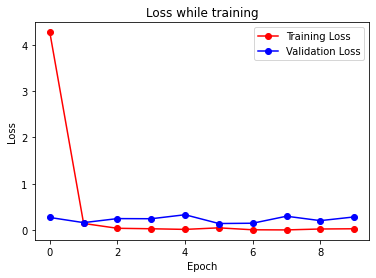

In [12]:
plt.plot(history.history["loss"],color="r",marker="o")
plt.plot(history.history["val_loss"],color="b",marker="o")
plt.title("Loss while training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.show()

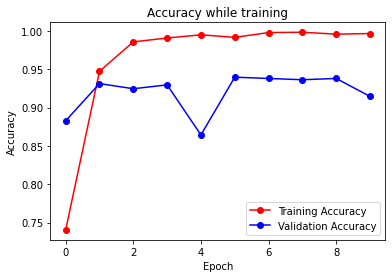

In [13]:
plt.plot(history.history["accuracy"],color="r",marker="o")
plt.plot(history.history["val_accuracy"],color="b",marker="o")
plt.title("Accuracy while training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [14]:
y_pred=cnn.predict(X_test)>=0.5

19/19 [==============================] - 3s 138ms/step


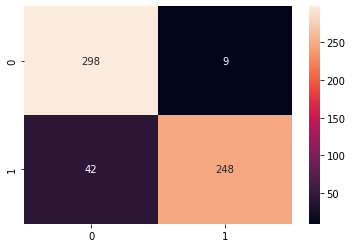

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.show()

In [16]:
print(f1_score(y_test,y_pred))

0.9067641681901281


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       307
           1       0.96      0.86      0.91       290

    accuracy                           0.91       597
   macro avg       0.92      0.91      0.91       597
weighted avg       0.92      0.91      0.91       597



In [18]:
print(accuracy_score(y_test,y_pred))

0.914572864321608


## Conclusion:
* We were able to acheive very good accuracy on this data set to use a single image to predict if it was from a page being flipped or not. Despite the use of low resolution image to optimize the computer resource, we had 91.4% accuracy on the test data with only 51 out of 597 images being misclassified. The F1-score was also about 0.915. 
* This model should be fine to use to detect if someone is flipping a page.